In [1]:
from __future__ import annotations
import itertools
import os
import numpy as np
import matplotlib.pyplot as plt
import getdist
import getdist.plots as gdplt
from pathlib import Path
from typing import Any, cast
from matplotlib.cm import tab10  # type: ignore
from cobaya import get_model
from eftpipe.reader import read_pkl

In [2]:
os.chdir("../")

In [3]:
from script.mkbestfit import main as mkbestfit
from script.mkbestfit import extract_sampled_bestfit
from script.load_rafa_chains import load_chains

In [4]:
plt.rcParams["text.usetex"] = True
GREY = tab10.colors[-3]
BLUE = tab10.colors[0]
ORANGE = tab10.colors[1]
GREEN = tab10.colors[2]
RED = tab10.colors[3]

In [5]:
def add_markers(
    g: gdplt.GetDistPlotter,
    markers: dict[str, float],
    marker_args: dict[str, Any] = {"c": "k", "ls": "--", "lw": 1},
    all_params: list[str] | None = None
):
    for name, value in markers.items():
        if ax := g.get_axes_for_params(name):
            ax.axvline(value, **marker_args)
    if all_params:
        all_params = all_params + list(markers.keys())
        all_params = list(set(all_params))
        for xname, xvalue in markers.items():
            for yname in all_params:
                if ax := g.get_axes_for_params(xname, yname):
                    ax.axvline(xvalue, **marker_args)
        for yname, yvalue in markers.items():
            for xname in all_params:
                if ax := g.get_axes_for_params(xname, yname):
                    ax.axhline(yvalue, **marker_args)
        return
    for (xname, xvalue), (yname, yvalue) in itertools.permutations(markers.items(), 2):
        if ax := g.get_axes_for_params(xname, yname):
            ax.axvline(xvalue, **marker_args)
            ax.axhline(yvalue, **marker_args)

def add_bestfit(
    g: gdplt.GetDistPlotter, bestfit: dict[str, float], color
):
    for (xname, xvalue), (yname, yvalue) in itertools.permutations(bestfit.items(), 2):
        if ax := g.get_axes_for_params(xname, yname):
            ax.scatter(xvalue, yvalue, color=color, marker="x")

In [6]:
truth = {
    "omegam": 0.307115,
    "sigma8": 0.8225,
    "H0": 67.77,
    "rdrag": 147.66,
    "omegach2": 0.1189,
    "omegabh2": 0.02214,
    "h": 0.6777,
    "logA": 3.05122,
}

In [7]:
settings = {"ignore_rows": 0.3}
pathlist = [
    "cobaya/chains/v2_noric_LRG_NGC_l02_Vx27_kmax0.20",
    "cobaya/chains/v2_noric_LRG_SGC_l02_Vx27_kmax0.20",
    "cobaya/chains/v2_noric_LRG_NS_l02_Vx27_kmax0.20",
]
names = [
    "LRG.NGC",
    "LRG.SGC",
    "LRG.NS",
]
samples = {
    k: getdist.loadMCSamples(path, settings=settings)
    for k, path in zip(names, pathlist)
}
bestfits = {
    k: extract_sampled_bestfit(path + ".minimum", False)
    for k, path in zip(names, pathlist)
}

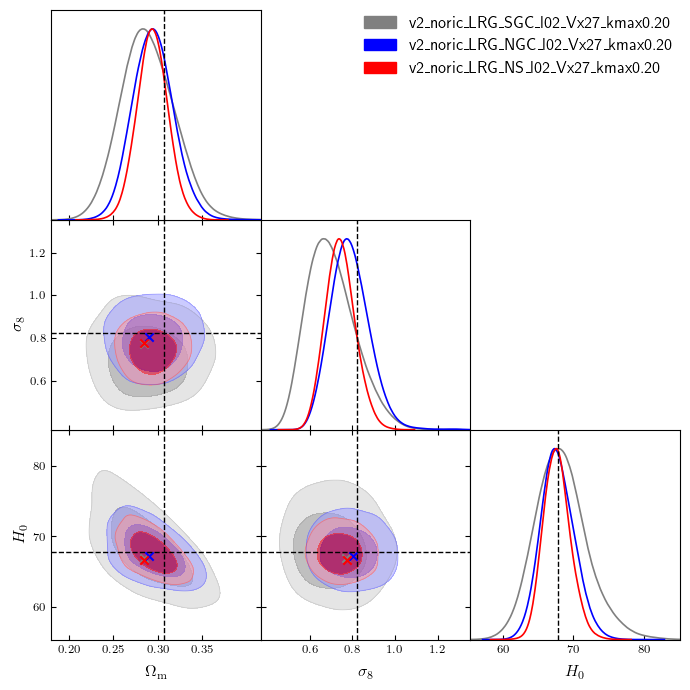

In [12]:
g = gdplt.get_subplot_plotter(width_inch=7)
g.settings.figure_legend_frame = False
g.settings.legend_fontsize = 14
g.settings.figure_legend_loc = "upper right"
# params = ["omegach2", "H0", "logA", "ELG_NGC_b1", "ELG_NGC_c2", "omegam", "sigma8"]
params = ["omegam", "sigma8", "H0"]
colors = ["grey", "b", "r"]
names = ["LRG.SGC", "LRG.NGC", "LRG.NS"]
g.triangle_plot(
    [samples[k] for k in names],
    params,
    filled=[True, True, True],
    diag1d_kwargs={"normalized": True},
    contour_colors=colors,
    contour_lws=[1.2] * 3,
    contour_args=[{"alpha": 0.5}, {"alpha": 0.5}, {"alpha": 0.5}]
)
for x, color in zip([bestfits[k] for k in names], colors):
    add_bestfit(g, x, color)
add_markers(g, truth, all_params=params)
plt.show()